In [217]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
%cd '/content/drive/My Drive/Colab Notebooks/U-demy - AI Program/AI in Healthcare/Brain_MRI'

/content/drive/My Drive/Colab Notebooks/U-demy - AI Program/AI in Healthcare/Brain_MRI


In [219]:
## Importing required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import random

In [220]:
## Reading the mask dataset provided from kaggle
df = pd.read_csv('data_mask.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [221]:
## Within dataset checking number of positive cancer masks and no masks
print("Number of tumors/masks: {}".format(str(df[df['mask'] == 1]['mask'].sum())))

Number of tumors/masks: 1373


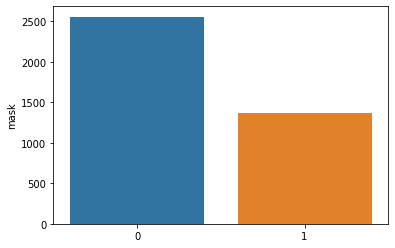

In [222]:
## Visually representing the unbalanced dataset.
sns.barplot(x=df['mask'].value_counts().index, y=df['mask'].value_counts())

In [223]:
## Doing the same with library plotly
import plotly.graph_objects as graph

fig = graph.Figure([graph.Bar(x = df['mask'].value_counts().index, y = df['mask'].value_counts())])
fig.show()
## Pretty cool, but prefer sns

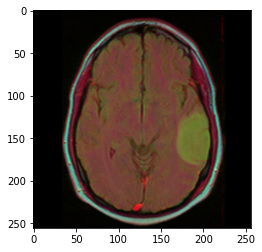

In [224]:
plt.imshow(cv2.imread(df.image_path[896]))

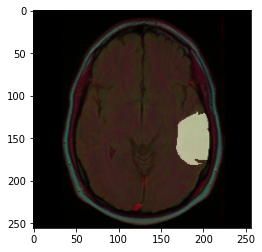

In [225]:
## Visualizing how the MRI and the tumor segmenation look on top of eachtoher
plt.imshow(cv2.imread(df.image_path[896]))
plt.imshow(cv2.imread(df.mask_path[896]), alpha=0.5)

## Note: Mask has two possible values 0 for representing black and 255 for white.

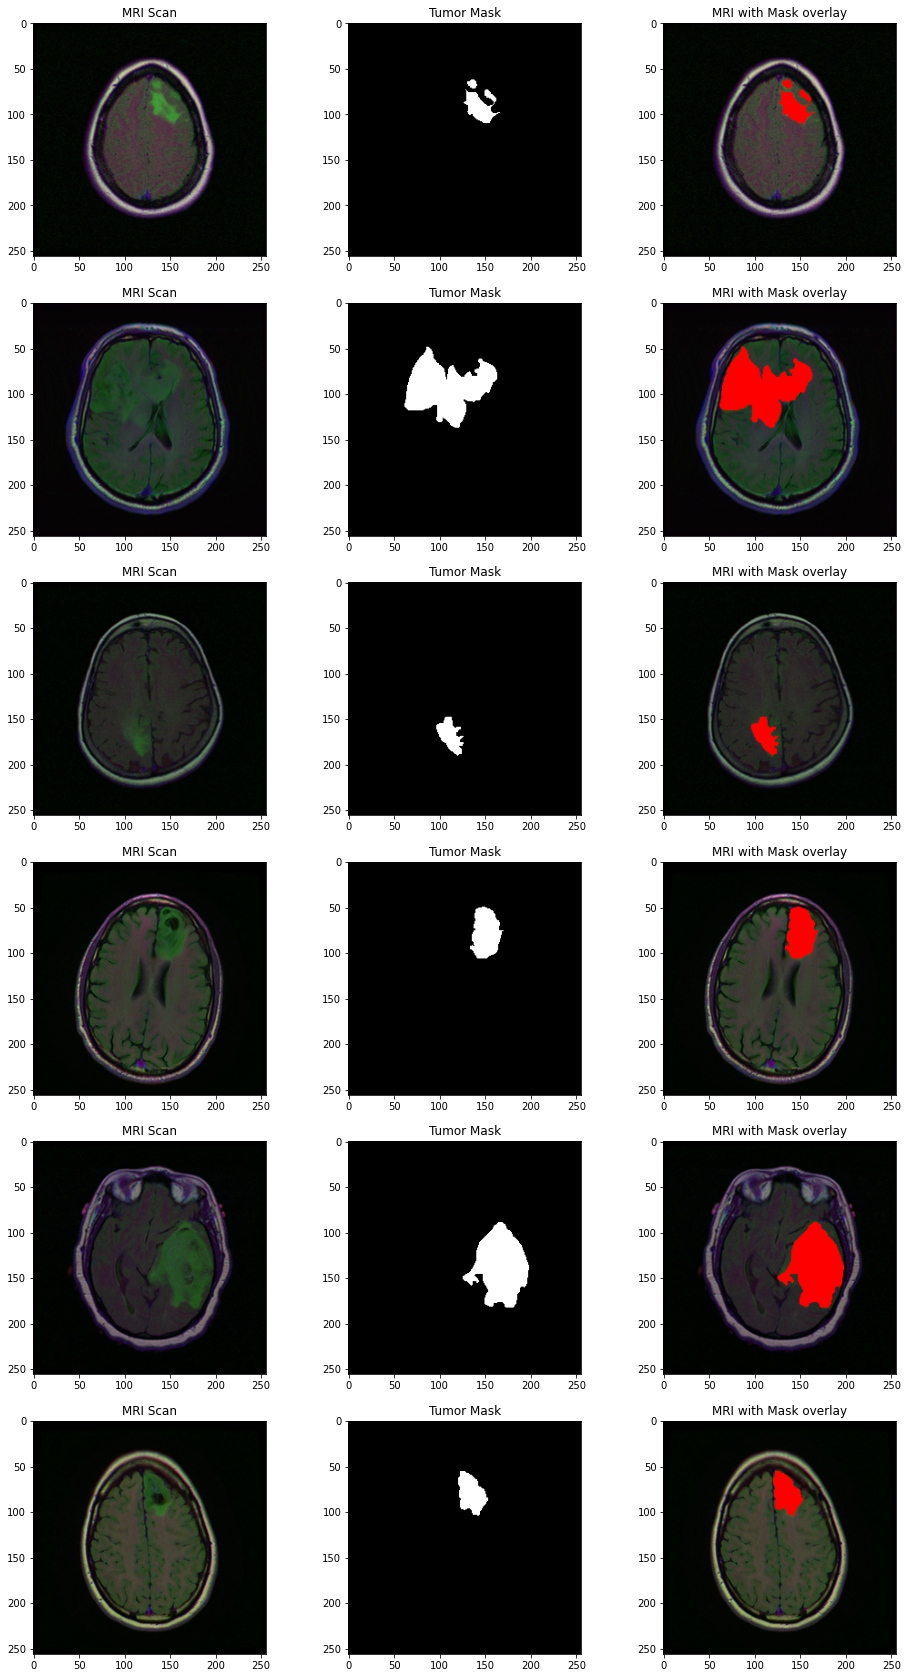

In [226]:
## Visualizing several images
fig, ax = plt.subplots(6,3, figsize=(16,30))
counter = 0
tumor_only = df.loc[df['mask'] == 1]
for i in range(6):
  index = random.randint(0, len(tumor_only))

  ## Reading in image and mask and replacing color of white with red
  img = io.imread(tumor_only.image_path.values[index])
  mask = io.imread(tumor_only.mask_path.values[index])

  ax[counter][0].title.set_text('MRI Scan')
  ax[counter][0].imshow(img)
  ax[counter][1].title.set_text('Tumor Mask')
  ax[counter][1].imshow(mask, cmap='gray')
  ax[counter][2].title.set_text('MRI with Mask overlay')

  ##Converting white mask values to red for easy localization and visualization
  img[mask == 255] = (255,0,0)
  ax[counter][2].imshow(img)
  counter += 1